## Step 1 - Load dataset

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/OnlineRetail.csv", encoding = 'latin')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Step 2 - Data Cleaning

In [5]:
df.shape

(541909, 8)

In [6]:
df.duplicated().sum()

5268

There are total **5268** duplicate rows in the dataset.

Since the total number of rows in dataset is **541909** which is very high so we can remove the duplicate rows in the dataset.

In [7]:
# Dropping all duplicate rows in the dataset.
df = df.drop_duplicates()

In [8]:
df.shape

(536641, 8)

In [9]:
df["InvoiceDate"].dtype

dtype('O')

The **"InvoiceDate"** column is **object** type so it needs to be converted to **datetime**.

In [10]:
# Convert to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df['InvoiceDate'].dtype

dtype('<M8[ns]')

Hence, **"InvoiceDate"** feature has been converted to **datetime** type.

Now, we are going to check if there are any negative values in the **"Quantity"** column 

In [12]:
# Checking negative values
(df['Quantity'] < 0).sum()

10587

There are total 10587 rows where there are negative values of **"Quantity"** column so we will remove all those rows.

In [13]:
# Storing all the postive values of "Quantity" column in the dataset eventually removing rows of negative values
df = df[df['Quantity'] > 0]

In [14]:
df.shape

(526054, 8)

In [15]:
# Inspecting if there is any negative values in the "Quantity" column
(df['Quantity'] < 0).sum()

0

Hence, there are no negative values of "Quantity" column now.

## Step 3 - Calculate Revenue

Now we are going to add one more column **"Revenue"** to the dataset by calculating it with the formulae :-
   - **Revenue = Quantity * UnitPrice**

In [16]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


The column **"Revenue"** has been added to the dataset successfully.

## Step 4 - Group & Analyze

Now, we are going to find **top** products based on **revenue**.

In [38]:
# Top 5 products generating the most revenue.
top_products = df.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)
top_products

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174156.54
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106236.72
PARTY BUNTING                          99445.23
JUMBO BAG RED RETROSPOT                94159.81
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
POSTAGE                                78101.88
Manual                                 77752.82
RABBIT NIGHT LIGHT                     66870.03
Name: Revenue, dtype: float64

**Insights** :-

 - A small number of products generate most revenue
 - Strong Pareto (80/20) effect
 - These products should be prioritized for inventory & promotions

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526054 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526054 non-null  object        
 1   StockCode    526054 non-null  object        
 2   Description  525462 non-null  object        
 3   Quantity     526054 non-null  int64         
 4   InvoiceDate  526054 non-null  datetime64[ns]
 5   UnitPrice    526054 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      526054 non-null  object        
 8   Revenue      526054 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.1+ MB


There are no other explicit category columns apart from **"Description"** which we can use to check performance.  

In [32]:
# Performing Country-wise Revenue Analysis
country_revenue = (df.groupby('Country')['Revenue'].sum().sort_values(ascending=False))
country_revenue

Country
United Kingdom          8979619.974
Netherlands              285446.340
EIRE                     283140.520
Germany                  228678.400
France                   209625.370
Australia                138453.810
Spain                     61558.560
Switzerland               57067.600
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33683.050
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15483.000
Cyprus                    13502.850
Austria                   10198.680
Israel                     8129.410
Poland                     7334.650
Greece                     4760.520
Unspecified                4740.940
Iceland                    4310.000
Canada                     3666.380
USA                 

**Insights** :-

- The above is **total revenue** generated **country-wise** where we can see that **United Kingdom** is at the top and **Saudi Arabia** is at the bottom.

- A few countries contribute majority of international sales

- High dependency on one country → geographic risk

In [35]:
# Monthly revenue trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Revenue'].sum()
pd.DataFrame(monthly_revenue)

,Revenue
Month,
2010-12,821452.730
2011-01,689811.610
2011-02,522545.560
2011-03,716215.260
2011-04,536968.491
2011-05,769296.610
2011-06,760547.010
2011-07,718076.121
2011-08,735717.260


**Insights** :-

- Clear seasonality pattern

- Revenue peaks in **November**.

- Sudden dips may indicate incomplete months or operational issues.

## Step 5 - Visualization

Now, we are going to visualize everything which we analyzed in **Step 4**. 

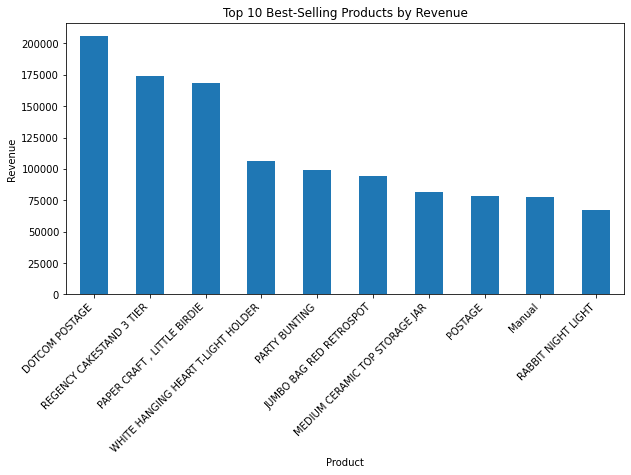

In [39]:
# Bar chart of top 10 best-selling products by revenue
top_products.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Best-Selling Products by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.xticks(rotation=45, ha='right')
plt.show()

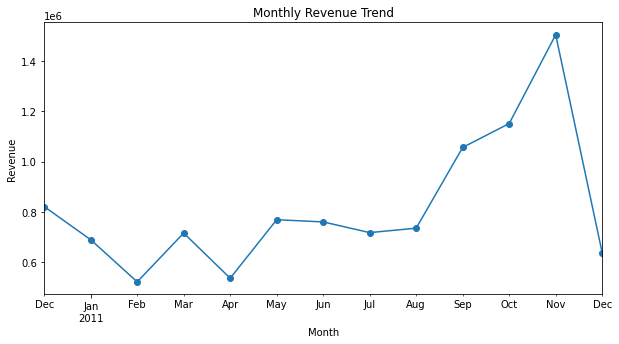

In [40]:
# Line graph of monthly revenue
monthly_revenue.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()

**Insights** :-

- Clear seasonality

- Revenue peaks toward year-end **(Nov–Dec)**

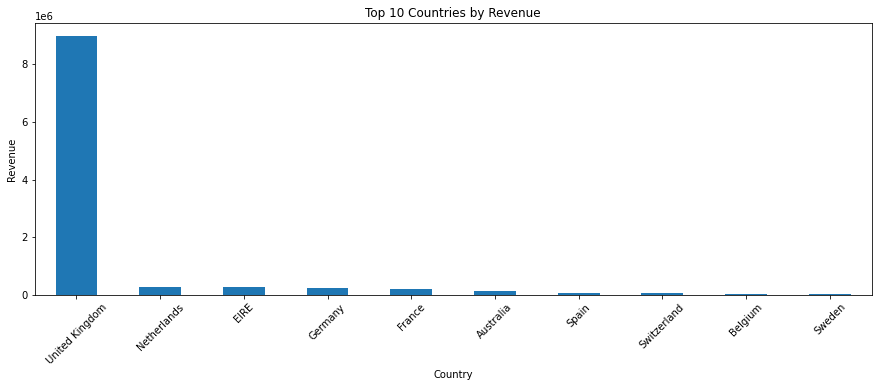

In [43]:
# Bar graph of top 10 best countries with highest revenue
country_revenue.head(10).plot(kind='bar', figsize=(15,5))
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

**Final Insight Summary** :-

- Revenue is highly concentrated in top products and categories

- Monthly trend shows strong seasonality

- **UK** is the primary revenue contributor

- Business depends on key products during peak months

## Step 6 - Build KPI summary

In [44]:
# Total revenue generated overall
total_revenue = df['Revenue'].sum()
total_revenue

10619986.684

**Insights** :-

- Represents overall business revenue

- Core metric for business performance tracking

In [45]:
# Total numbers of orders placed
total_orders = df['InvoiceNo'].nunique()
total_orders

20728

**Insights** :-

- Shows order volume

- Helps assess demand and transaction activity

In [47]:
# The best selling-product based on revenue

top_product = (
    df.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .idxmax()
)

top_product

'DOTCOM POSTAGE'

**Insights** :- 

- Identifies best-performing product

- Critical for inventory & promotion planning

In [48]:
# The country with highest revenue
top_country = (
    df.groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .idxmax()
)

top_country

'United Kingdom'

**Insights** :-

- Highlights primary market

- Reveals geographic dependency

We had already checked the **monthly growth trend** earlier, so now let's check month-over-month Growth (%)

In [50]:
monthly_growth = monthly_revenue.pct_change() * 100
monthly_growth

Month
2010-12          NaN
2011-01   -16.025404
2011-02   -24.248077
2011-03    37.062740
2011-04   -25.026941
2011-05    43.266620
2011-06    -1.137351
2011-07    -5.584256
2011-08     2.456723
2011-09    43.592552
2011-10     8.976276
2011-11    30.627478
2011-12   -57.589972
Freq: M, Name: Revenue, dtype: float64

**Insights** :-

- Positive growth → expanding business
- Negative dips → seasonality or operational issues
- Helps in forecasting & planning

**Final Consolidated Insights** :-

- **Revenue** is highly concentrated among a small number of products, indicating a strong **Pareto effect**.
- **UK** is the primary revenue driver, contributing the majority of total sales.
- **International** markets contribute smaller but stable revenue streams.
- Monthly revenue shows **strong** seasonality, with peaks during year-end months.
- Business performance depends heavily on **product** availability during peak months.
- **Country-wise** diversification could reduce revenue risk.